In [22]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
import pandas as pd
from astropy.table import vstack
from matplotlib import pyplot as plt

In [44]:
# Define the file path
file_file = "../Data/jpas_bin_4_18.5to19.5i.fits"


In [45]:
# Abre el archivo FITS
with fits.open(file_file) as hdul:
    # Accede al primer HDU (Header Data Unit)
    data = hdul[1].data  # Ajusta el índice si el archivo tiene múltiples HDUs
    # Convierte el contenido en una Astropy Table
    table = Table(data)

In [46]:
# Imprime la tabla
print(table)

number    alpha_j2000        delta_j2000     ... mask_isdss class_star
------ ------------------ ------------------ ... ---------- ----------
 26016  339.3640665149103 22.403464904724583 ...          0      0.835
 26040  339.3839068449052 22.402762094816953 ...          0      0.906
 26126  339.2892554394035  22.40179048210722 ...          0      0.028
 26169 338.97458380356005 22.395620640874082 ...          0      0.997
 26172 339.09389656907774 22.400714311927562 ...          0      0.028
 26185 339.11501350212654 22.400434504291788 ...          0      0.026
 26219 339.48560284964225  22.39868983479259 ...          0      0.001
 26220 338.58395838825754 22.399448103421797 ...          0      0.999
 26226  338.8002891942292 22.399500217446356 ...          0      0.029
 26260  339.1218035492595 22.399155416693446 ...          0      0.929
   ...                ...                ... ...        ...        ...
 25709 338.85580525635254  22.40837790494071 ...          0      0.028
 25787

In [47]:
for i in table.columns:
    print(i)

number
alpha_j2000
delta_j2000
tile_id
mag_j0600_cor
mag_j0610_cor
mag_j0620_cor
mag_j0630_cor
mag_j0640_cor
mag_j0650_cor
err_j0600_cor
err_j0610_cor
err_j0620_cor
err_j0630_cor
err_j0640_cor
err_j0650_cor
mag_j0660_cor
mag_isdss_cor
err_j0660_cor
err_isdss_cor
flags_j0660
flags_isdss
mask_j0660
mask_isdss
class_star


In [48]:
 # 1. Calcular pseudo-r y colores
r_filters = ['mag_j0600_cor', 'mag_j0610_cor', 'mag_j0620_cor',
                'mag_j0630_cor', 'mag_j0640_cor', 'mag_j0650_cor']
r_errors = ['err_j0600_cor', 'err_j0610_cor', 'err_j0620_cor',
               'err_j0630_cor', 'err_j0640_cor', 'err_j0650_cor']

In [49]:
# Calcular el promedio simple para pseudo-r
table['pseudo_r'] = np.mean([table[col] for col in r_filters], axis=0)

In [50]:
# Calcular la propagación de errores (suma cuadrática de los errores dividida por 6)
table['e_pseudo_r'] = np.sqrt(np.sum([table[col]**2 for col in r_errors], axis=0)) / 6

In [51]:
#Imprimir para verificar
print(table['pseudo_r', 'e_pseudo_r'])


 pseudo_r  e_pseudo_r
--------- -----------
 19.87066 0.027601875
19.321762 0.016821314
19.919802 0.028270332
19.176476 0.015006655
19.591644 0.021246688
 19.51225 0.019730996
19.313583  0.01729984
19.504038  0.01862015
19.583437 0.021519467
19.869173 0.028108165
      ...         ...
19.411789 0.017962974
20.364344  0.04327682
19.451681 0.017495692
19.321579 0.016388636
20.118273 0.031768255
19.944487  0.02856803
18.994883 0.012495294
19.784248  0.02315292
18.945131 0.012303052
20.385405 0.042956013
Length = 85981 rows


In [52]:
x = table['pseudo_r'] - table['mag_isdss_cor']
y = table['pseudo_r'] - table['mag_j0660_cor']

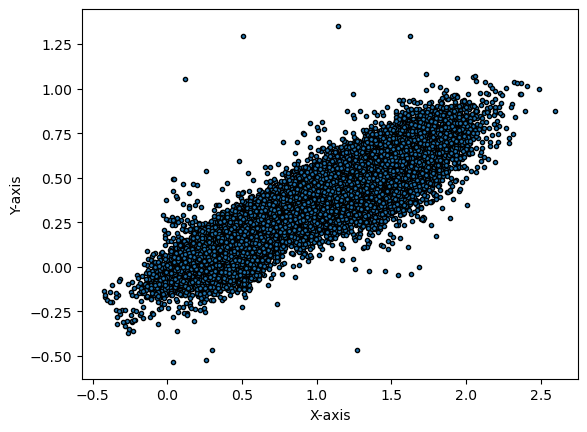

In [53]:
plt.scatter(x, y, marker=".", edgecolors="k")
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# Show the plot
plt.show()